In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
data=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
data 

Id                                              Model  Price  Age_08_04  Mfg_Month  ...  Sport_Model  Backseat_Divider Metallic_Rim  Radio_cassette  Tow_Bar
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23         10  ...            0                 1            0               0        0
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23         10  ...            0                 1            0               0        0
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24          9  ...            0                 1            0               0        0
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26          7  ...            0                 1            0               0        0
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30          3  ...            0                 1            0               0        0
...    ...                                                ...    ...        ...        ...  ...          ...               ...          ...             ...      ...
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500         69         12  ...            1                 1            0               0        0
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845         72          9  ...            1                 1            0               0        0
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500         71         10  ...            0                 1            0               0        0
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250         70         11  ...            0                 1            0               0        0
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950         76          5  ...            0                 0            0               0        0

[1436 rows x 38 columns]

In [3]:
pd.set_option("display.max_rows",None)

In [4]:
data.shape

(1436, 38)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
data = data [['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [8]:
data

Price  Age_08_04      KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23   46986   90   2000      3      5            210    1165
1     13750         23   72937   90   2000      3      5            210    1165
2     13950         24   41711   90   2000      3      5            210    1165
3     14950         26   48000   90   2000      3      5            210    1165
4     13750         30   38500   90   2000      3      5            210    1170
5     12950         32   61000   90   2000      3      5            210    1170
6     16900         27   94612   90   2000      3      5            210    1245
7     18600         30   75889   90   2000      3      5            210    1245
8     21500         27   19700  192   1800      3      5            100    1185
9     12950         23   71138   69   1900      3      5            185    1105
10    20950         25   31461  192   1800      3      6            100    1185
11    19950         22   43610  192   1800      3      6            100    1185
12    19600         25   32189  192   1800      3      6            100    1185
13    21500         31   23000  192   1800      3      6            100    1185
14    22500         32   34131  192   1800      3      6            100    1185
15    22000         28   18739  192   1800      3      6            100    1185
16    22750         30   34000  192   1800      3      5            100    1185
17    17950         24   21716  110   1600      3      5             85    1105
18    16750         24   25563  110   1600      3      5             19    1065
19    16950         30   64359  110   1600      3      5             85    1105
20    15950         30   67660  110   1600      3      5             85    1105
21    16950         29   43905  110   1600      3      5            100    1170
22    15950         28   56349  110   1600      3      5             85    1120
23    16950         28   32220  110   1600      3      5             85    1120
24    16250         29   25813  110   1600      3      5             85    1120
25    15950         25   28450  110   1600      3      5             85    1120
26    17495         27   34545  110   1600      3      5             85    1120
27    15750         29   41415  110   1600      3      5             85    1120
28    16950         28   44142  110   1600      3      5             85    1120
29    17950         30   11090  110   1600      3      5             85    1120
30    12950         29    9750   97   1400      3      5             19    1100
31    15750         22   35199   97   1400      3      5             85    1100
32    15950         27   29510   97   1400      3      5             85    1100
33    14950         26   32692   97   1400      3      5             85    1100
34    15500         22   41000   97   1400      3      5             85    1100
35    15750         26   43000   97   1400      3      5             85    1100
36    15950         25   25000   97   1400      3      5             85    1100
37    14950         23   10000   97   1400      3      5             85    1100
38    15750         32   25329   97   1400      3      5             85    1100
39    14750         27   27500   97   1400      3      5             85    1100
40    13950         22   49059   97   1400      3      5             85    1100
41    16750         27   44068   97   1400      3      5             85    1100
42    13950         22   46961   97   1400      3      5             85    1100
43    16950         27  110404   90   2000      5      5            234    1255
44    16950         22  100250   90   2000      5      5            234    1255
45    19000         23   84000   90   2000      5      5            234    1270
46    17950         27   79375   90   2000      5      5            234    1255
47    15800         22   75048   97   1400      5      5             85    1110
48    17950         22   72215   90   2000      5      5            234    1255
49    

In [9]:
data=data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data

Price  Age      KM   HP     CC  Doors  Gears   QT  Weight
0     13500   23   46986   90   2000      3      5  210    1165
1     13750   23   72937   90   2000      3      5  210    1165
2     13950   24   41711   90   2000      3      5  210    1165
3     14950   26   48000   90   2000      3      5  210    1165
4     13750   30   38500   90   2000      3      5  210    1170
5     12950   32   61000   90   2000      3      5  210    1170
6     16900   27   94612   90   2000      3      5  210    1245
7     18600   30   75889   90   2000      3      5  210    1245
8     21500   27   19700  192   1800      3      5  100    1185
9     12950   23   71138   69   1900      3      5  185    1105
10    20950   25   31461  192   1800      3      6  100    1185
11    19950   22   43610  192   1800      3      6  100    1185
12    19600   25   32189  192   1800      3      6  100    1185
13    21500   31   23000  192   1800      3      6  100    1185
14    22500   32   34131  192   1800      3      6  100    1185
15    22000   28   18739  192   1800      3      6  100    1185
16    22750   30   34000  192   1800      3      5  100    1185
17    17950   24   21716  110   1600      3      5   85    1105
18    16750   24   25563  110   1600      3      5   19    1065
19    16950   30   64359  110   1600      3      5   85    1105
20    15950   30   67660  110   1600      3      5   85    1105
21    16950   29   43905  110   1600      3      5  100    1170
22    15950   28   56349  110   1600      3      5   85    1120
23    16950   28   32220  110   1600      3      5   85    1120
24    16250   29   25813  110   1600      3      5   85    1120
25    15950   25   28450  110   1600      3      5   85    1120
26    17495   27   34545  110   1600      3      5   85    1120
27    15750   29   41415  110   1600      3      5   85    1120
28    16950   28   44142  110   1600      3      5   85    1120
29    17950   30   11090  110   1600      3      5   85    1120
30    12950   29    9750   97   1400      3      5   19    1100
31    15750   22   35199   97   1400      3      5   85    1100
32    15950   27   29510   97   1400      3      5   85    1100
33    14950   26   32692   97   1400      3      5   85    1100
34    15500   22   41000   97   1400      3      5   85    1100
35    15750   26   43000   97   1400      3      5   85    1100
36    15950   25   25000   97   1400      3      5   85    1100
37    14950   23   10000   97   1400      3      5   85    1100
38    15750   32   25329   97   1400      3      5   85    1100
39    14750   27   27500   97   1400      3      5   85    1100
40    13950   22   49059   97   1400      3      5   85    1100
41    16750   27   44068   97   1400      3      5   85    1100
42    13950   22   46961   97   1400      3      5   85    1100
43    16950   27  110404   90   2000      5      5  234    1255
44    16950   22  100250   90   2000      5      5  234    1255
45    19000   23   84000   90   2000      5      5  234    1270
46    17950   27   79375   90   2000      5      5  234    1255
47    15800   22   75048   97   1400      5      5   85    1110
48    17950   22   72215   90   2000      5      5  234    1255
49    21950   31   64982  192   1800      5      6  100    1195
50    17950   22   62636   90   2000      5      5  234    1255
51    15750   30   57086   97   1400      5      5   85    1110
52    20500   26   56000  110   1600      5      5  100    1180
53    21950   27   49866  192   1800      5      5  100    1195
54    15500   25   49163  110   1600      5      5  100    1165
55    13250   32   45725  110   1600      5      5   85    1075
56    15250   28   43210   97   1400      5      5   85    1110
57    15250   26   43000   97   1400      5      5   85    1110
58    18950   23   39704  110   1600      5      5  100    1180
59    15999   30   38950  110   1600      5      5   85    1130
60    14950   22   37400   97   1400      5      5   85    1110
61    16500   27   37177  110   1600  

In [10]:
data[data.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [12]:
data=data.drop_duplicates().reset_index(drop=True)
data

Price  Age      KM   HP     CC  Doors  Gears   QT  Weight
0     13500   23   46986   90   2000      3      5  210    1165
1     13750   23   72937   90   2000      3      5  210    1165
2     13950   24   41711   90   2000      3      5  210    1165
3     14950   26   48000   90   2000      3      5  210    1165
4     13750   30   38500   90   2000      3      5  210    1170
5     12950   32   61000   90   2000      3      5  210    1170
6     16900   27   94612   90   2000      3      5  210    1245
7     18600   30   75889   90   2000      3      5  210    1245
8     21500   27   19700  192   1800      3      5  100    1185
9     12950   23   71138   69   1900      3      5  185    1105
10    20950   25   31461  192   1800      3      6  100    1185
11    19950   22   43610  192   1800      3      6  100    1185
12    19600   25   32189  192   1800      3      6  100    1185
13    21500   31   23000  192   1800      3      6  100    1185
14    22500   32   34131  192   1800      3      6  100    1185
15    22000   28   18739  192   1800      3      6  100    1185
16    22750   30   34000  192   1800      3      5  100    1185
17    17950   24   21716  110   1600      3      5   85    1105
18    16750   24   25563  110   1600      3      5   19    1065
19    16950   30   64359  110   1600      3      5   85    1105
20    15950   30   67660  110   1600      3      5   85    1105
21    16950   29   43905  110   1600      3      5  100    1170
22    15950   28   56349  110   1600      3      5   85    1120
23    16950   28   32220  110   1600      3      5   85    1120
24    16250   29   25813  110   1600      3      5   85    1120
25    15950   25   28450  110   1600      3      5   85    1120
26    17495   27   34545  110   1600      3      5   85    1120
27    15750   29   41415  110   1600      3      5   85    1120
28    16950   28   44142  110   1600      3      5   85    1120
29    17950   30   11090  110   1600      3      5   85    1120
30    12950   29    9750   97   1400      3      5   19    1100
31    15750   22   35199   97   1400      3      5   85    1100
32    15950   27   29510   97   1400      3      5   85    1100
33    14950   26   32692   97   1400      3      5   85    1100
34    15500   22   41000   97   1400      3      5   85    1100
35    15750   26   43000   97   1400      3      5   85    1100
36    15950   25   25000   97   1400      3      5   85    1100
37    14950   23   10000   97   1400      3      5   85    1100
38    15750   32   25329   97   1400      3      5   85    1100
39    14750   27   27500   97   1400      3      5   85    1100
40    13950   22   49059   97   1400      3      5   85    1100
41    16750   27   44068   97   1400      3      5   85    1100
42    13950   22   46961   97   1400      3      5   85    1100
43    16950   27  110404   90   2000      5      5  234    1255
44    16950   22  100250   90   2000      5      5  234    1255
45    19000   23   84000   90   2000      5      5  234    1270
46    17950   27   79375   90   2000      5      5  234    1255
47    15800   22   75048   97   1400      5      5   85    1110
48    17950   22   72215   90   2000      5      5  234    1255
49    21950   31   64982  192   1800      5      6  100    1195
50    17950   22   62636   90   2000      5      5  234    1255
51    15750   30   57086   97   1400      5      5   85    1110
52    20500   26   56000  110   1600      5      5  100    1180
53    21950   27   49866  192   1800      5      5  100    1195
54    15500   25   49163  110   1600      5      5  100    1165
55    13250   32   45725  110   1600      5      5   85    1075
56    15250   28   43210   97   1400      5      5   85    1110
57    15250   26   43000   97   1400      5      5   85    1110
58    18950   23   39704  110   1600      5      5  100    1180
59    15999   30   38950  110   1600      5      5   85    1130
60    14950   22   37400   97   1400      5      5   85    1110
61    16500   27   37177  110   1600  

In [13]:
data.describe()

Price          Age             KM           HP            CC        Doors        Gears           QT       Weight
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000  1435.000000  1435.000000  1435.000000  1435.000000
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976     4.032753     5.026481    87.020209  1072.287108
std     3608.732978    18.563312   37491.094553    14.981408    424.387533     0.952667     0.188575    40.959588    52.251882
min     4350.000000     1.000000       1.000000    69.000000   1300.000000     2.000000     3.000000    19.000000  1000.000000
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000     3.000000     5.000000    69.000000  1040.000000
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000     4.000000     5.000000    85.000000  1070.000000
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000     5.000000     5.000000    85.000000  1085.000000
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000     5.000000     6.000000   283.000000  1615.000000

In [14]:
data.describe

<bound method NDFrame.describe of       Price  Age      KM   HP     CC  Doors  Gears   QT  Weight
0     13500   23   46986   90   2000      3      5  210    1165
1     13750   23   72937   90   2000      3      5  210    1165
2     13950   24   41711   90   2000      3      5  210    1165
3     14950   26   48000   90   2000      3      5  210    1165
4     13750   30   38500   90   2000      3      5  210    1170
5     12950   32   61000   90   2000      3      5  210    1170
6     16900   27   94612   90   2000      3      5  210    1245
7     18600   30   75889   90   2000      3      5  210    1245
8     21500   27   19700  192   1800      3      5  100    1185
9     12950   23   71138   69   1900      3      5  185    1105
10    20950   25   31461  192   1800      3      6  100    1185
11    19950   22   43610  192   1800      3      6  100    1185
12    19600   25   32189  192   1800      3      6  100    1185
13    21500   31   23000  192   1800      3      6  100    1185
14    

# Correlation

In [15]:
data.corr()

Price       Age        KM        HP        CC     Doors     Gears        QT    Weight
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831  0.211508  0.575869
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629 -0.193319 -0.466484
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890  0.283312 -0.023969
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642 -0.302287  0.087143
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732  0.305982  0.335077
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101  0.107353  0.301734
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000 -0.005125  0.021238
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125  1.000000  0.621988
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238  0.621988  1.000000

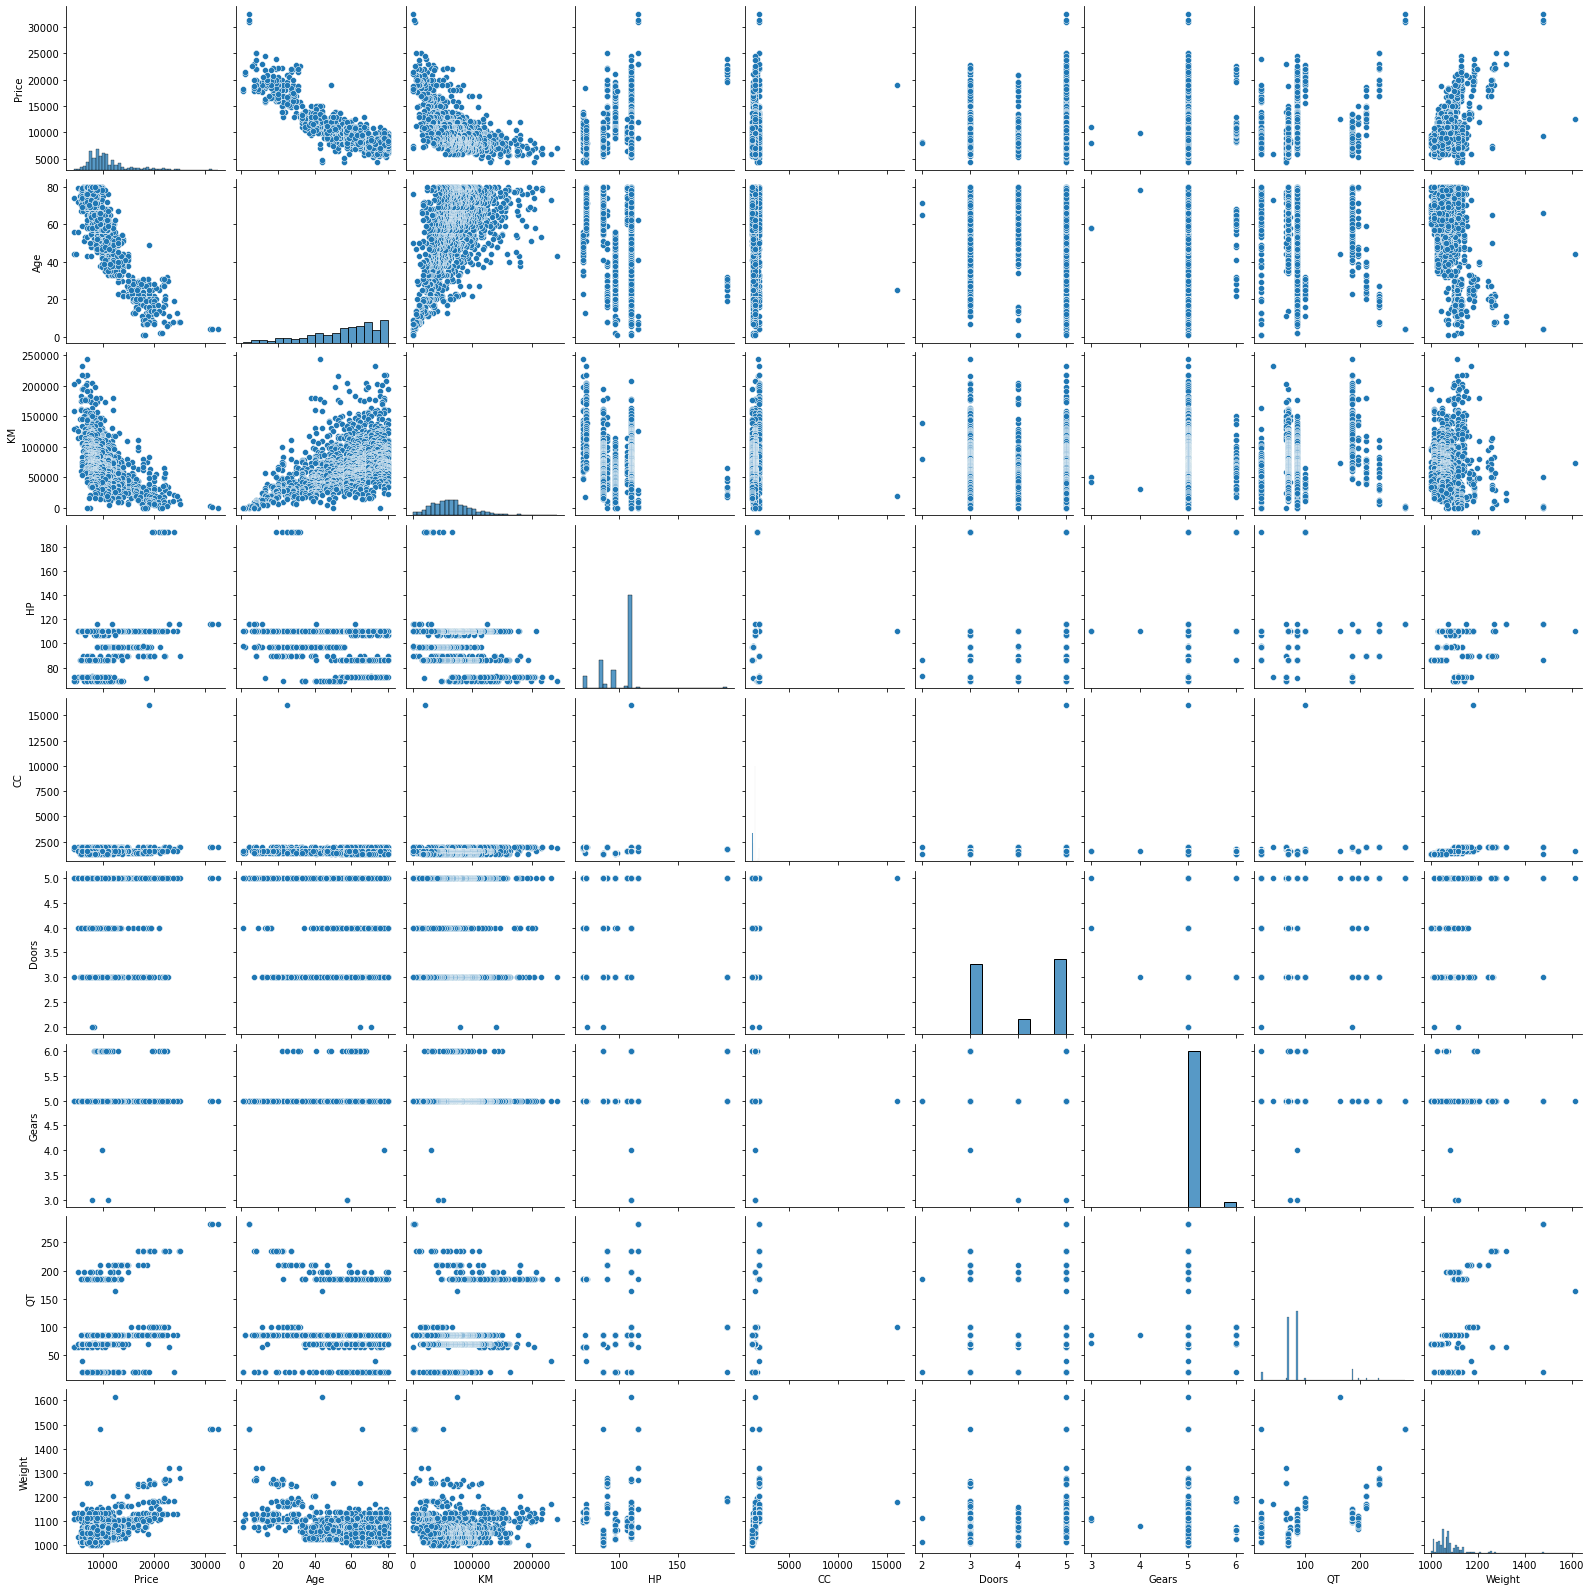

In [17]:
sns.pairplot(data)

# Regression Model

In [19]:
X = data[['Age','KM','HP','CC','Doors','Gears','QT','Weight']]
Y = data[['Price']]

In [21]:
model = smf.OLS(Y, X).fit()
predictions = model.predict(X)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.245e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:01:48   Log-Likelihood:                         -12374.
No. Observations:                1435   AIC:                                  2.476e+04
Df Residuals:                    1427   BIC:                                  2.481e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -125.4366      2.444    -51.332      0.000    -130.230    -120.643
KM            -0.0204      0.001    -16.239      0.000      -0.023      -0.018
HP            33.3304      2.795     11.925      0.000      27.848      38.813
CC            -0.1007      0.090     -1.114      0.265      -0.278       0.077
Doors         -6.3603     40.159     -0.158      0.874     -85.138      72.417
Gears         92.5332    148.382      0.624      0.533    -198.537     383.604
QT             5.6875      1.229      4.629      0.000       3.277       8.098
Weight        13.9761      0.773     18.081      0.000      12.460      15.492
==============================================================================
Omnibus:                      109.540   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.984
Skew:                           0.030   Prob(JB):                    6.24e-125
Kurtosis:                       6.092   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print(model.tvalues, '\n', model.pvalues)

Age      -51.332103
KM       -16.239296
HP        11.925029
CC        -1.114188
Doors     -0.158376
Gears      0.623614
QT         4.628702
Weight    18.080773
dtype: float64 
 Age       0.000000e+00
KM        1.512905e-54
HP        2.551687e-31
CC        2.653862e-01
Doors     8.741826e-01
Gears     5.329805e-01
QT        4.013898e-06
Weight    5.883641e-66
dtype: float64


In [24]:
(model.rsquared , model.rsquared_adj)

(0.9858697705458587, 0.9857905541228502)

C:\Users\Pavani\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


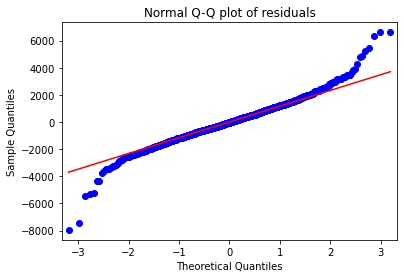

In [25]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [26]:
list(np.where(model.resid>6000)) 

[array([109, 146, 522], dtype=int64)]

In [27]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

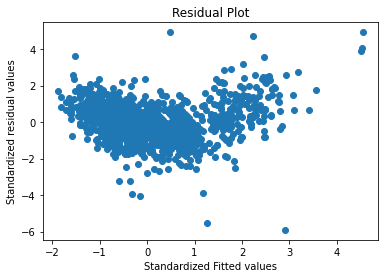

In [28]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

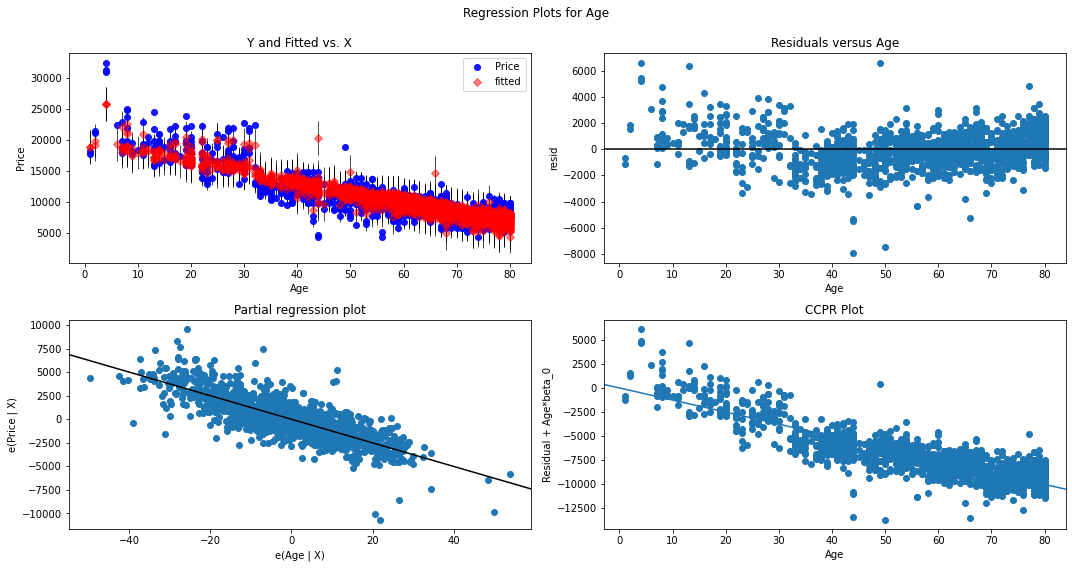

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

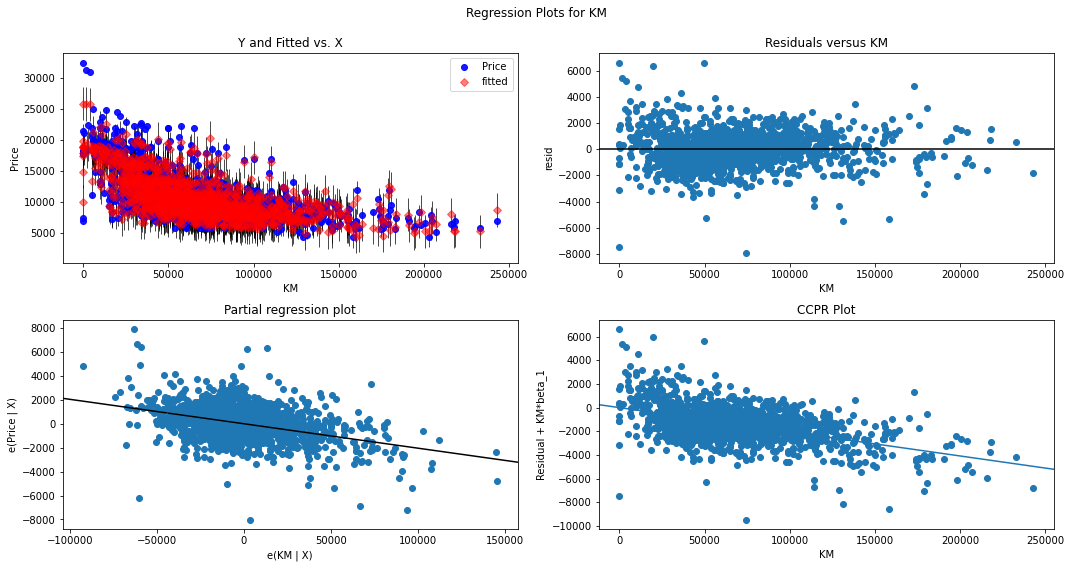

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

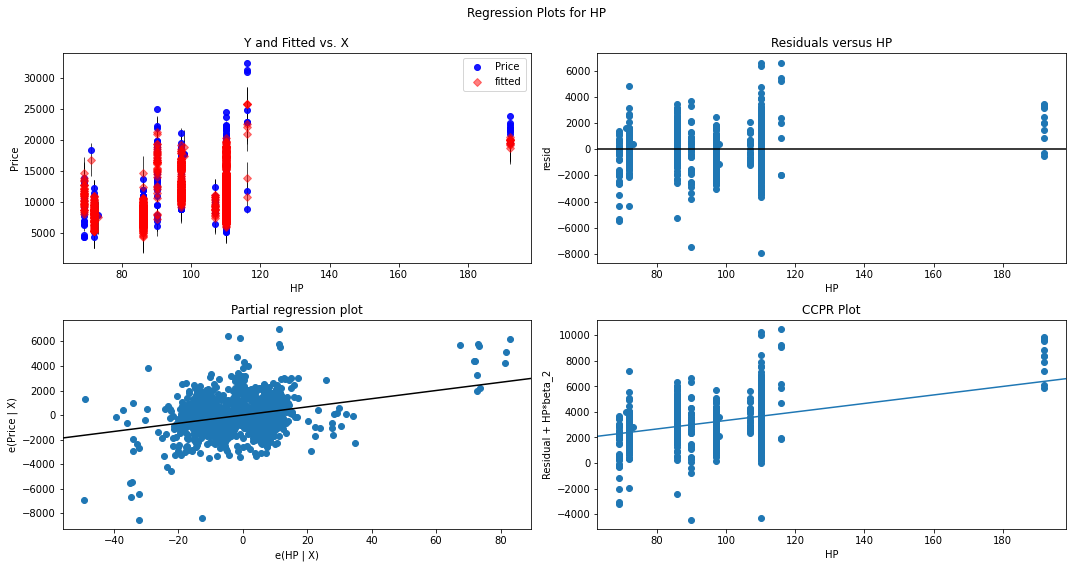

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

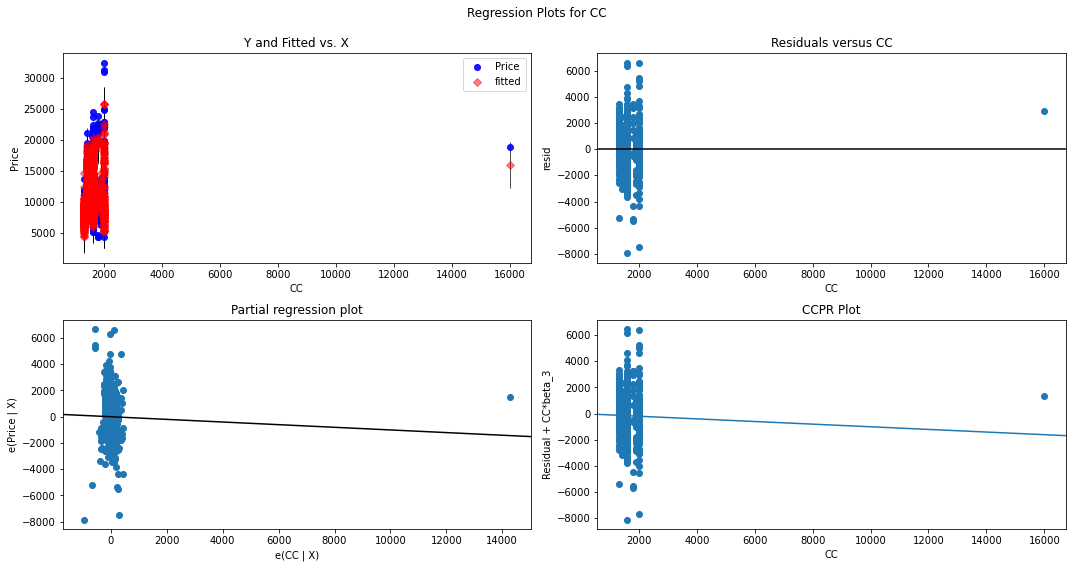

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

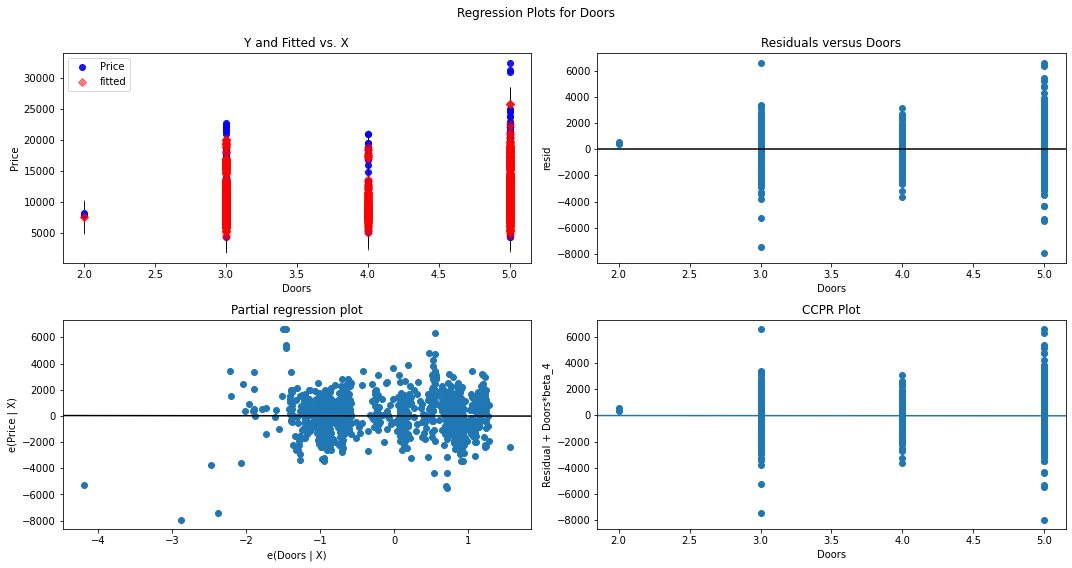

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

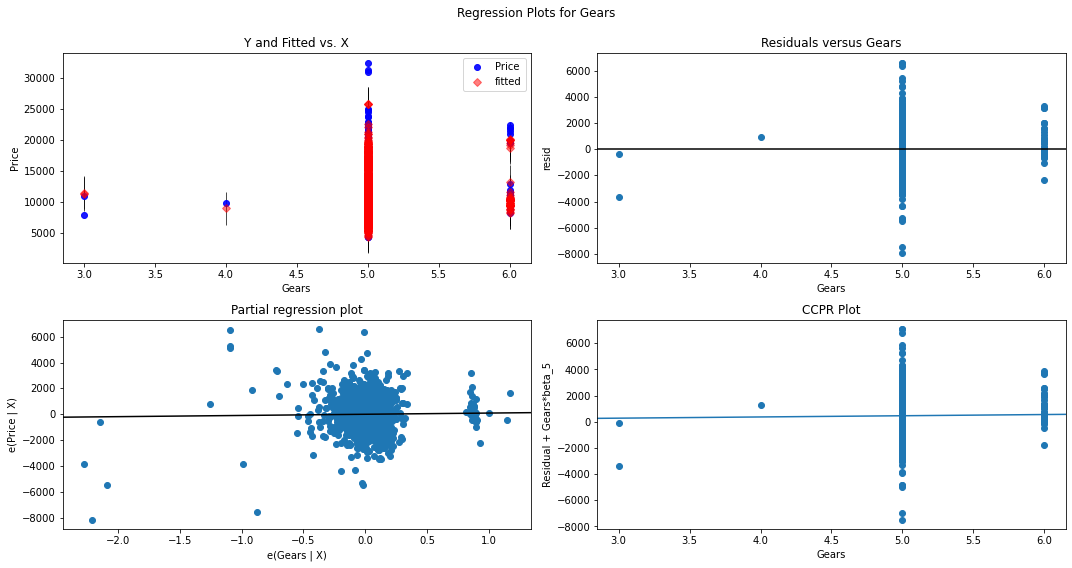

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

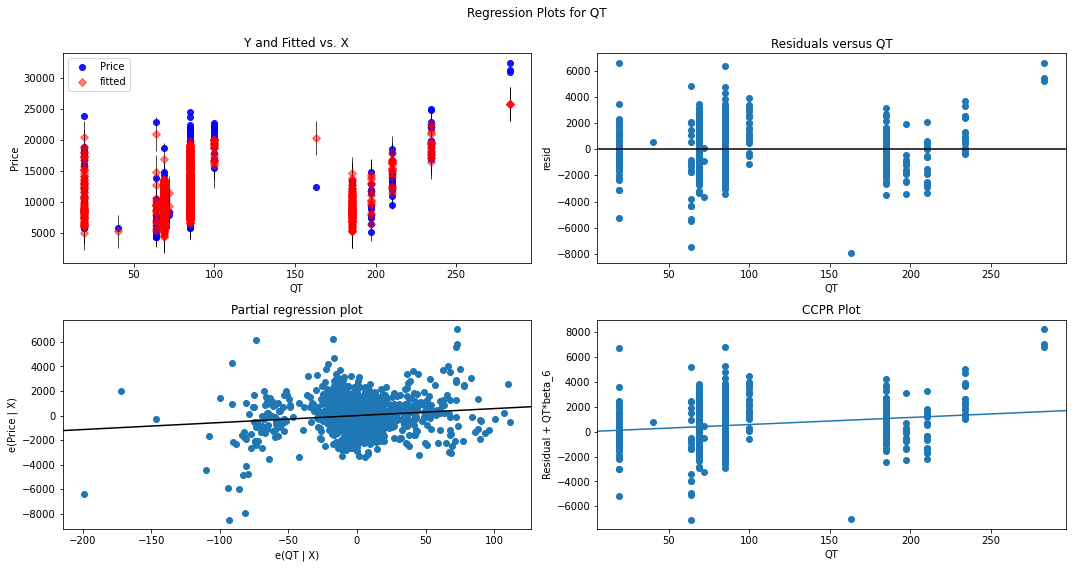

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

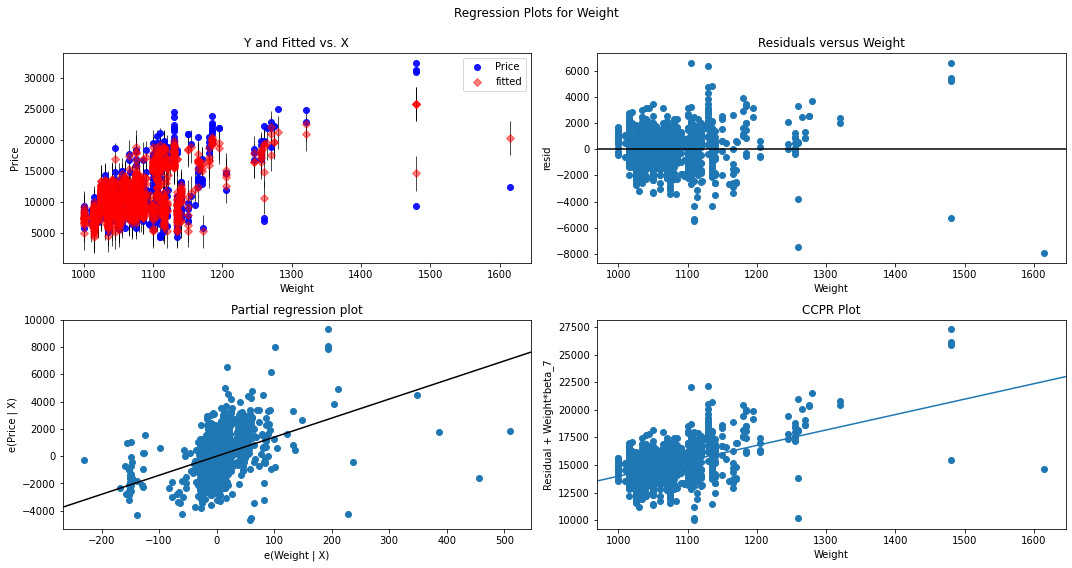

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [37]:
#Model Deletion Diagnostics Detecting Influencers or Outliers

model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

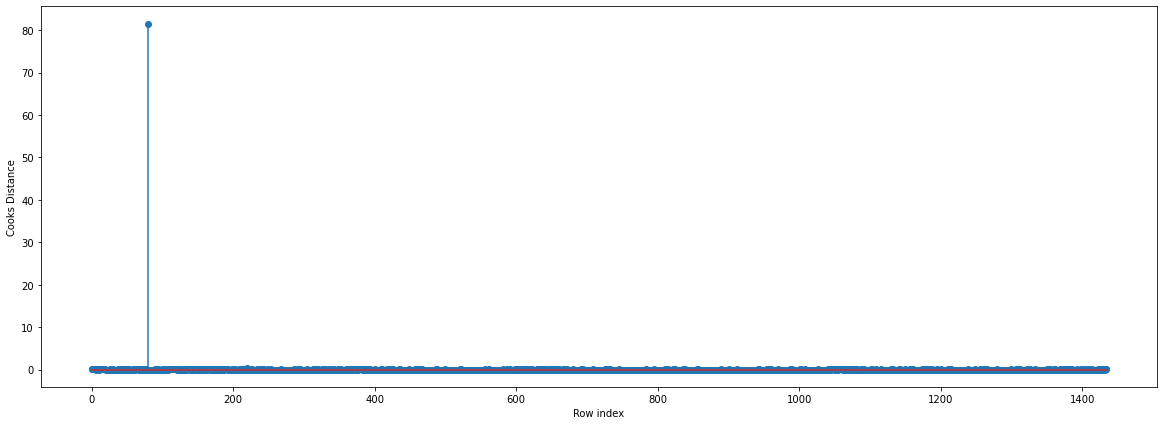

In [38]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 81.53999328986639)

In [42]:
#High Influence points
infl = model.get_influence()

In [43]:
sum_data = infl.summary_frame()

In [44]:
sum_data.sort_values('cooks_d', ascending=False)

dfb_Age        dfb_KM    dfb_HP        dfb_CC  dfb_Doors     dfb_Gears  ...       cooks_d  standard_resid  hat_diag  dffits_internal  student_resid     dffits
80   -0.287213 -2.338772e+00 -2.772129  2.600592e+01   0.644975  9.124783e-01  ...  8.153999e+01        7.633772  0.917992        25.540555       7.791853  26.069452
220  -0.253511 -2.144529e-02  0.170037  4.179101e-01   0.552787  1.569527e+00  ...  3.705074e-01       -6.126430  0.073192        -1.721644      -6.206448  -1.744131
959  -0.208003  3.842423e-02  0.441589  1.977091e-01   0.538733  9.935350e-01  ...  2.074678e-01       -4.094812  0.090070        -1.288310      -4.117639  -1.295492
109   0.105225 -3.011852e-01  0.119567 -1.942458e-01  -0.224095 -6.191548e-01  ...  1.272359e-01        5.002263  0.039089         1.008904       5.044938   1.017511
600  -0.212757  3.193334e-01  0.383540 -1.100947e-01   0.404348  5.515317e-01  ...  9.669677e-02       -5.588608  0.024170        -0.879531      -5.648809  -0.889005
111   0.082661 -2.401447e-01  0.098781 -1.591014e-01  -0.183202 -5.059536e-01  ...  8.503624e-02        4.098255  0.038927         0.824797       4.121143   0.829403
110   0.073928 -2.206646e-01  0.096409 -1.531067e-01  -0.175745 -4.850120e-01  ...  7.758366e-02        3.928254  0.038667         0.787826       3.948283   0.791843
990  -0.260815  2.886914e-02 -0.126778  4.369766e-02   0.177823  7.235782e-01  ...  6.653332e-02       -2.785965  0.064176        -0.729566      -2.792594  -0.731302
190   0.286033 -3.545282e-01  0.270338 -6.146164e-02  -0.083525  1.316160e-02  ...  3.528676e-02       -3.987053  0.017448        -0.531314      -4.008043  -0.534111
16   -0.028986  7.101828e-02  0.451940 -4.197905e-02  -0.173464 -2.079603e-01  ...  3.152245e-02        2.579688  0.036511         0.502175       2.584818   0.503174
191   0.234631 -2.589413e-01  0.296905 -7.077385e-02  -0.088392  9.633776e-03  ...  2.900749e-02       -4.092595  0.013666        -0.481726      -4.115384  -0.484408
140  -0.113186  1.251388e-01  0.369965 -8.014874e-03  -0.033666 -2.103338e-01  ...  2.779279e-02        2.605281  0.031719         0.471532       2.610584   0.472492
1057 -0.059288  2.491390e-01 -0.223711  9.097477e-02   0.051092 -1.311300e-01  ...  2.543486e-02        3.610064  0.015373         0.451086       3.625392   0.453002
14   -0.110057  5.353124e-02  0.386446 -2.226276e-02  -0.105586  7.621105e-02  ...  2.503013e-02        2.505194  0.030919         0.447483       2.509841   0.448313
653  -0.013487 -1.019817e-01  0.132982 -3.308753e-02   0.212454  3.141510e-01  ...  2.381393e-02       -2.836176  0.023136        -0.436476      -2.843207  -0.437558
49   -0.147019  1.189030e-01  0.366709 -2.610084e-02   0.036725  9.105693e-02  ...  2.227571e-02        2.374284  0.030644         0.422144       2.378154   0.422832
522  -0.063349  6.128623e-02 -0.045979  3.141654e-02  -0.223480 -2.041942e-01  ...  2.211444e-02        4.917708  0.007262         0.420613       4.958178   0.424075
188   0.141272 -2.340595e-01 -0.187848  6.526745e-02   0.073316 -3.503405e-02  ...  1.620574e-02       -2.567202  0.019292        -0.360064      -2.572250  -0.360772
114  -0.011681 -1.535474e-01 -0.056189 -1.659662e-02  -0.001076 -7.122949e-02  ...  1.575340e-02        2.741807  0.016488         0.355003       2.748094   0.355817
392   0.109772 -1.570985e-01  0.232630 -5.650841e-02  -0.068757  3.026430e-02  ...  1.506487e-02       -3.221270  0.011481        -0.347158      -3.231914  -0.348305
401   0.077051 -1.134015e-01  0.237685 -9.418141e-02  -0.052009  7.053092e-02  ...  1.500323e-02       -3.249499  0.011239        -0.346447      -3.260446  -0.347615
53   -0.045822  8.090325e-02  0.316210 -3.178308e-02  -0.016531 -1.298875e-01  ...  1.459348e-02        1.836499  0.033457         0.341684       1.838029   0.341969
146  -0.222171  9.133936e-03 -0.009620 -1.226075e-02   0.077054 -6.473331e-03  ...  1.400657e-02        4.703277  0.005040         0.334742       4.738499   0.337249
91    0.000056 -9.28985

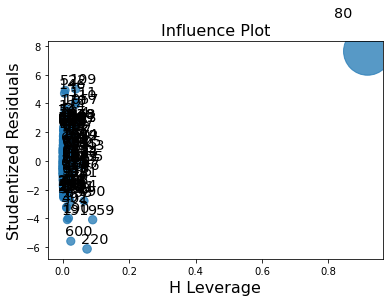

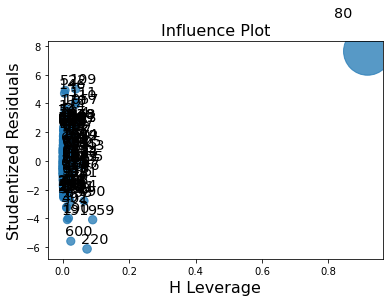

In [45]:
infl.plot_influence()

In [46]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

# Finding Variance Inflation Factor 

In [47]:
vif = pd.DataFrame()

In [48]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [49]:
vif["features"] = X.columns

In [50]:
vif.round(1)

VIF Factor features
0        16.4      Age
1         7.6       KM
2        64.9       HP
3        17.2       CC
4        21.9    Doors
5       439.7    Gears
6        11.0       QT
7       543.5   Weight

# As expected, Geras and Weight have a high variance inflation factor. We need to exclude the variable to improve the model

In [51]:
#Exclude Weight fron the dataframe and Tested the model
new_X = data[['Age','KM','HP','CC','Doors','Gears','QT']]

In [52]:
new_model = smf.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [53]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.154e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:20:04   Log-Likelihood:                         -12522.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.509e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -132.0040      2.678    -49.290      0.000    -137.257    -126.751
KM            -0.0207      0.001    -14.871      0.000      -0.023      -0.018
HP            44.2013      3.025     14.612      0.000      38.267      50.135
CC             0.1824      0.099      1.849      0.065      -0.011       0.376
Doors        272.1994     41.101      6.623      0.000     191.574     352.825
Gears       2424.8250     81.274     29.835      0.000    2265.395    2584.255
QT            16.7533      1.181     14.188      0.000      14.437      19.070
==============================================================================
Omnibus:                      190.934   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              619.371
Skew:                           0.653   Prob(JB):                    3.20e-135
Kurtosis:                       5.941   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final model

In [54]:
new_data = data.drop(data.index[80])

In [58]:
new_data=data.drop(data.index[[80]],axis=0).reset_index(drop=True)
new_data 

Price  Age      KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23   46986   90  2000      3      5  210    1165
1     13750   23   72937   90  2000      3      5  210    1165
2     13950   24   41711   90  2000      3      5  210    1165
3     14950   26   48000   90  2000      3      5  210    1165
4     13750   30   38500   90  2000      3      5  210    1170
5     12950   32   61000   90  2000      3      5  210    1170
6     16900   27   94612   90  2000      3      5  210    1245
7     18600   30   75889   90  2000      3      5  210    1245
8     21500   27   19700  192  1800      3      5  100    1185
9     12950   23   71138   69  1900      3      5  185    1105
10    20950   25   31461  192  1800      3      6  100    1185
11    19950   22   43610  192  1800      3      6  100    1185
12    19600   25   32189  192  1800      3      6  100    1185
13    21500   31   23000  192  1800      3      6  100    1185
14    22500   32   34131  192  1800      3      6  100    1185
15    22000   28   18739  192  1800      3      6  100    1185
16    22750   30   34000  192  1800      3      5  100    1185
17    17950   24   21716  110  1600      3      5   85    1105
18    16750   24   25563  110  1600      3      5   19    1065
19    16950   30   64359  110  1600      3      5   85    1105
20    15950   30   67660  110  1600      3      5   85    1105
21    16950   29   43905  110  1600      3      5  100    1170
22    15950   28   56349  110  1600      3      5   85    1120
23    16950   28   32220  110  1600      3      5   85    1120
24    16250   29   25813  110  1600      3      5   85    1120
25    15950   25   28450  110  1600      3      5   85    1120
26    17495   27   34545  110  1600      3      5   85    1120
27    15750   29   41415  110  1600      3      5   85    1120
28    16950   28   44142  110  1600      3      5   85    1120
29    17950   30   11090  110  1600      3      5   85    1120
30    12950   29    9750   97  1400      3      5   19    1100
31    15750   22   35199   97  1400      3      5   85    1100
32    15950   27   29510   97  1400      3      5   85    1100
33    14950   26   32692   97  1400      3      5   85    1100
34    15500   22   41000   97  1400      3      5   85    1100
35    15750   26   43000   97  1400      3      5   85    1100
36    15950   25   25000   97  1400      3      5   85    1100
37    14950   23   10000   97  1400      3      5   85    1100
38    15750   32   25329   97  1400      3      5   85    1100
39    14750   27   27500   97  1400      3      5   85    1100
40    13950   22   49059   97  1400      3      5   85    1100
41    16750   27   44068   97  1400      3      5   85    1100
42    13950   22   46961   97  1400      3      5   85    1100
43    16950   27  110404   90  2000      5      5  234    1255
44    16950   22  100250   90  2000      5      5  234    1255
45    19000   23   84000   90  2000      5      5  234    1270
46    17950   27   79375   90  2000      5      5  234    1255
47    15800   22   75048   97  1400      5      5   85    1110
48    17950   22   72215   90  2000      5      5  234    1255
49    21950   31   64982  192  1800      5      6  100    1195
50    17950   22   62636   90  2000      5      5  234    1255
51    15750   30   57086   97  1400      5      5   85    1110
52    20500   26   56000  110  1600      5      5  100    1180
53    21950   27   49866  192  1800      5      5  100    1195
54    15500   25   49163  110  1600      5      5  100    1165
55    13250   32   45725  110  1600      5      5   85    1075
56    15250   28   43210   97  1400      5      5   85    1110
57    15250   26   43000   97  1400      5      5   85    1110
58    18950   23   39704  110  1600      5      5  100    1180
59    15999   30   38950  110  1600      5      5   85    1130
60    14950   22   37400   97  1400      5      5   85    1110
61    16500   27   37177  110  1600      5      5   85    1130
62    18750   31   36544  110  1600  

In [55]:
new_X = new_data[['Age','KM','HP','CC','Doors','Gears','QT']]
new_Y = new_data[['Price']]

In [56]:
final_model = smf.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [57]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.151e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):                        0.00
Time:                        13:23:37   Log-Likelihood:                         -12513.
No. Observations:                1434   AIC:                                  2.504e+04
Df Residuals:                    1427   BIC:                                  2.508e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -131.9582      2.680    -49.241      0.000    -137.215    -126.701
KM            -0.0209      0.001    -14.516      0.000      -0.024      -0.018
HP            43.4509      3.285     13.225      0.000      37.006      49.896
CC             0.3561      0.312      1.140      0.254      -0.257       0.969
Doors        269.9634     41.288      6.539      0.000     188.973     350.954
Gears       2399.9357     91.714     26.168      0.000    2220.027    2579.844
QT            16.1897      1.523     10.631      0.000      13.202      19.177
==============================================================================
Omnibus:                      190.000   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.500
Skew:                           0.649   Prob(JB):                    4.95e-135
Kurtosis:                       5.944   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""